# Convert DTI to Numpy Arrays

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import glob
import os
import sys
import shutil
import numpy as np
import pandas as pd
import nilearn.image as nim
import nilearn.plotting as nip
import sys
sys.path.append("../scripts")
import dti as D

from collections import defaultdict

## Flatten Folders

In [92]:
# Goal: convert DTI images to numpy arrays.

META_FILE = "../data/meta/dti_all_original_meta.csv"
DATA_SRC_PATH = "/home/eager/data/PPMI/dti_original"
DATA_DEST_PATH = "/home/eager/modeling-parkinsons/data/raw/ppmi_dti_pd/"

In [94]:
for root, dirs, files in os.walk(DATA_SRC_PATH, topdown=False):
    for f in files:
        fname, fext = os.path.splitext(f)
        fpath = os.path.join(root, f)
        
        src = fpath
        dest = DATA_DEST_PATH
        
        if fext == ".nii":
            print(fname)
#             try:
#                 shutil.move(src, dest)
#             except:
#                 print(f"{dest} already exists!")

## Load NII images

In [63]:
IMG_SRC_PATH = "/home/eager/modeling-parkinsons/data/raw/ppmi_dti_control/"
ALL_INPUT_IMG_PATHS = glob.glob(f"{IMG_SRC_PATH}/*")

In [64]:
first_impath = ALL_INPUT_IMG_PATHS[0]
print(f"first iamge path: {first_impath}")
im = nim.load_img(first_impath)

first iamge path: /home/eager/modeling-parkinsons/data/raw/ppmi_dti_control/PPMI_3160_MR_DTI_gated__br_raw_20120409123157846_46_S146629_I296471.nii


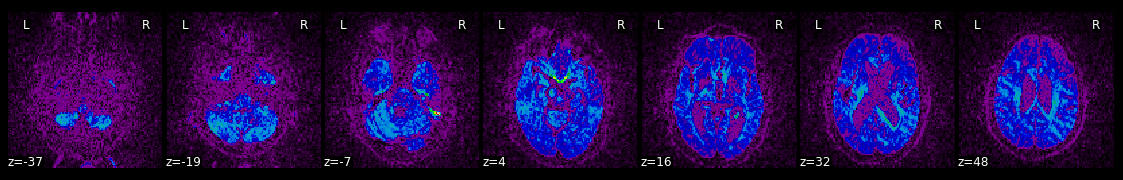

In [65]:
nip.plot_epi(im, display_mode="z")

In [86]:
meta = D.prep_meta_df(pd.read_csv(META_FILE))

In [67]:
meta.query("iid == 243818")

,iid,pid,group,sex,age,visit,modality,desc,type,acq_date,fmt
952,243818,3853,Control,M,47,1,DTI,DTI_gated,Original,2011-06-07,DCM


In [68]:
im.get_fdata().shape

(116, 116, 72, 1)

## Check that all images are of the same size

In [69]:
all_shapes = defaultdict(int)

for fpath in ALL_INPUT_IMG_PATHS:
    try:
        im = nim.load_img(fpath)
        all_shapes[im.get_fdata().shape] += 1
    except Exception as e:
        print(e)
        print(fpath)

Expected 1937664 bytes, got 1834656 bytes from /home/eager/modeling-parkinsons/data/raw/ppmi_dti_control/PPMI_3816_MR_DTI_gated__br_raw_20121017103610217_40_S171107_I340642.nii
 - could the file be damaged?
/home/eager/modeling-parkinsons/data/raw/ppmi_dti_control/PPMI_3816_MR_DTI_gated__br_raw_20121017103610217_40_S171107_I340642.nii


In [70]:
all_shapes

defaultdict(int,
            {(116, 116, 72, 1): 20125,
             (116, 116, 76, 1): 195,
             (122, 122, 72, 1): 195,
             (116, 116, 74, 1): 130,
             (1044, 1044, 65, 1): 2})

## Check that metadata contains all the images downloaded

In [58]:
for fpath in ALL_INPUT_IMG_PATHS:
    imi = D.get_iminf_from_fpath(fpath)
    assert len(meta[meta["iid"] == imi.iid]) == 1

In [74]:
meta["new_iid"] = meta.apply(lambda x: "PPMI" + str(x), + str(meta["iid"])

In [88]:
meta["pid"] = "PPMI" + meta["pid"].astype(np.str)

In [91]:
meta.to_csv("/home/eager/modeling-parkinsons/data/meta/dti_all_original_meta_preprocess.csv", index=False)